In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

In [2]:
# HIDDEN 
def bivariate_normal_regression(rho, n):
    x = stats.norm.rvs(size=n)
    z = stats.norm.rvs(size=n)
    y = rho * x  +  (1 - rho**2)**0.5 * z
    plt.scatter(x, y, color='darkblue', s=10)
    if rho >= 0:
        plt.plot([-4, 4], [-4, 4], color='red', lw=2, label='y = x')
    else:
        plt.plot([-4, 4], [4, -4], color='red', lw=2, label='y = -x')
    
    plt.plot([-4, 4], [rho*(-4), rho*(4)], color='green', lw=2, label='Regression Line: y = '+str(rho)+'x')
    
    # Axes, labels, and titles
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.axes().set_aspect('equal')
    plt.legend(bbox_to_anchor=(2, 1.02))
    plt.xlabel('$X$')
    plt.ylabel('$Y$', rotation=0)
    plt.title('Standard Bivariate Normal, Correlation '+str(rho))

## Regression and the Bivariate Normal ##

Let $X$ and $Y$ be standard bivariate normal with correlatin $\rho$. The relation 

$$
Y ~ = ~ \rho X + \sqrt{1 - \rho^2}Z
$$

where $X$ and $Z$ are independent standard normal variables leads directly the best predictor of $Y$ based on all functions of $X$. You know that the best predictor is the conditional expectation $E(Y \mid X)$, and clearly,

$$
E(Y \mid X) ~ = ~ \rho X
$$

because $Z$ is independent of $X$ and $E(Z) = 0$. 

Because $E(Y \mid X)$ is a linear function of $X$, we have shown:

**If $X$ and $Y$ have a standard bivariate normal distribution, then the best predictor of $Y$ based on $X$ is linear,** and has the equation of the regression line derived in the previous section.

Every bivariate normal distribution can be constructed by linear transformations of standard bivariate normal variables. Therefore:

**If $X$ and $Y$ are bivariate normal, then the best linear predictor of $Y$ based on $X$ is also the best among all predictors of $Y$ based on $X$.**

The function `bivariate_normal_regression` takes $\rho$ and $n$ as its arguments and displays a scatter plot of $n$ points generated from the standard bivariate normal distribution with correlation $\rho$. It also shows the 45 degree "equal standard units" line in red and the line $E(Y \mid X) = \rho X$ in green. 

You saw such plots in Data 8 but run the cell a few times anyway to refresh your memory. You can see the regression effect when $\rho > 0$: the green line is flatter than the red "equal standard units" 45 degree line. 

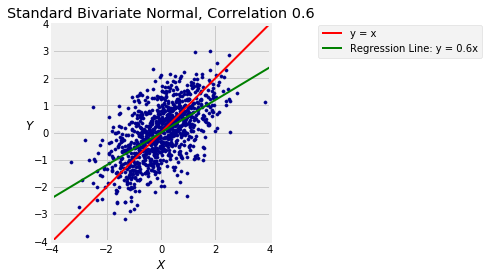

In [3]:
bivariate_normal_regression(0.6, 1000)

### Prediction Error ###
By definition, $Y$ is equal to a "signal" that is a linear function of $X$, plus some noise equal to $\sqrt{1 - \rho^2}Z$. The best predictor of $Y$ based on $X$ is the linear function $\rho X$. 

The mean squared error of this prediction is

$$
Var(Y \mid X) ~ = ~ (1 - \rho^2)Var(Z) ~ = ~ 1 - \rho^2
$$

which doesn't depend on $X$. This makes sense because the "noise" term in the definition of $Y$ is independent of $X$.

### Distribution in a Vertical Strip ###
If $X$ and $Y$ are standard bivariate normal with correlation $\rho$, the calculations above show that the conditional distribution of $Y$ given $X = x$  is normal with mean $\rho x$ and SD $\sqrt{1 - \rho^2}$.

### Predicting Ranks ###
Suppose the scatter diagram of verbal and math test scores of a large population of students is roughly oval and that the correlation between the two variables is 0.5.

Given that a randomly picked student is on the 80th percentile of verbal scores, what is your prediction of the student's percentile rank on the math scores?

One way to answer such questions is by making some probabilistic assumptions. Rough approximations to the reality, based on the information given, are that the student's standardized math score $M$ and standardized verbal score $V$ have the standard bivariate normal distribution with correlation $\rho = 0.5$. 

Given that the student is on the 80th percentile of verbal scores, we know they are at what Python calls the 80 percent point of the standard normal curve. So their score in standard units is approximately 0.84:

In [4]:
standard_units_x = stats.norm.ppf(0.8)
standard_units_x

0.8416212335729143

The regression prediction of the math score in standard units is $0.5 \times 0.84 = 0.42$.

In [5]:
rho = 0.5
standard_units_predicted_y = rho * standard_units_x
standard_units_predicted_y

0.42081061678645715

The area to the left of 0.42 under the standard normal curve is about 66%, so your prediction is that the student will be on roughly the 66th percentile of math scores.

In [6]:
stats.norm.cdf(standard_units_predicted_y)

0.6630533107760167

Don't worry about decimal points and great accuracy in such settings. The calculation is based on a probabilistic model about data; deviations from that model will have a much larger effect on the quality of the prediction than whether your answer is the 67th percentile instead of the 66th.

You should notice, however, that the regression effect is clearly visible in the answer. The student's predicted math score is closer to average than their verbal score.